In [1]:
# install machine gnostics

# recommended to run in a new virtual environment

# !pip install machine-gnostics

# Gnostics Interval Analysis

End-to-End Marginal Interval Analysis for Gnostic Distribution Functions (GDF)

The IntervalAnalysis class provides a robust, automated workflow for estimating meaningful data intervals (such as tolerance and typical intervals) using Gnostic Distribution Functions (GDFs) like ELDF and EGDF. It is designed for reliability, diagnostics, and adaptive interval estimation in scientific and engineering data analysis.

This class orchestrates the complete process:

Fits an EGDF to the data for global distribution analysis and homogeneity testing.
Optionally re-fits for non-homogeneous data and issues warnings if needed.
Fits an ELDF for local distribution analysis.
Computes robust data intervals using the DataIntervals engine, enforcing ordering constraints.
Provides detailed diagnostics, warnings, and error tracking.
Offers visualization methods for both the fitted distributions and the estimated intervals.

- **LB**: Lower Bound  
The practical lower limit for the interval (may be set by user or inferred).

- **LSB**: Lower Sample (Membership) Bound  
The lowest value for which data is homogeneous.

- **DLB**: Data Lower Bound  
The absolute minimum value present in the data.

- **LCB**: Lower Cluster Bound  
The lower edge of the main data cluster.

- **LSD**: Lower Standard Deviation Bound 
The lowest value as per gnostic standard deviation.

- **ZL**: Z0 Lower Interval  
The lower bound of the typical interval.

- **Z0L**: Z0 Lower Bound  
The lower bound of the tolerance interval.

- **Z0**: Central Value (Gnostic Mean)  
The central parameter of the distribution (gnostic mean).

- **Z0U**: Z0 Upper Bound  
The upper bound of the tolerance interval.

- **ZU**: Z0 Upper Interval  
The upper bound of the typical interval.

- **USD**: Upper Support/Domain Bound  
The highest value in the support or domain of the fitted distribution.

- **UCB**: Upper Cluster Bound  
The upper edge of the main data cluster.

- **DUB**: Data Upper Bound  
The absolute maximum value present in the data.

- **USB**: Upper Sample (Membership) Bound  
The highest value for which data is homogeneous (membership analysis).

- **UB**: Upper Bound  
The practical upper limit for the interval (may be set by user or inferred).

In [2]:
# lets take a small data set example with one outlier
import numpy as np

# stack loss data
data = np.array([42, 37, 37, 28, 18, 18, 19, 20, 15, 14, 14, 13, 11, 12,  8,  7,  8,  8,  9, 15, 15])

data = np.array([-13.5, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10])

# print the data
print("Data: ", data)

Data:  [-13.5   1.    2.    3.    4.    5.    6.    7.    8.    9.   10. ]


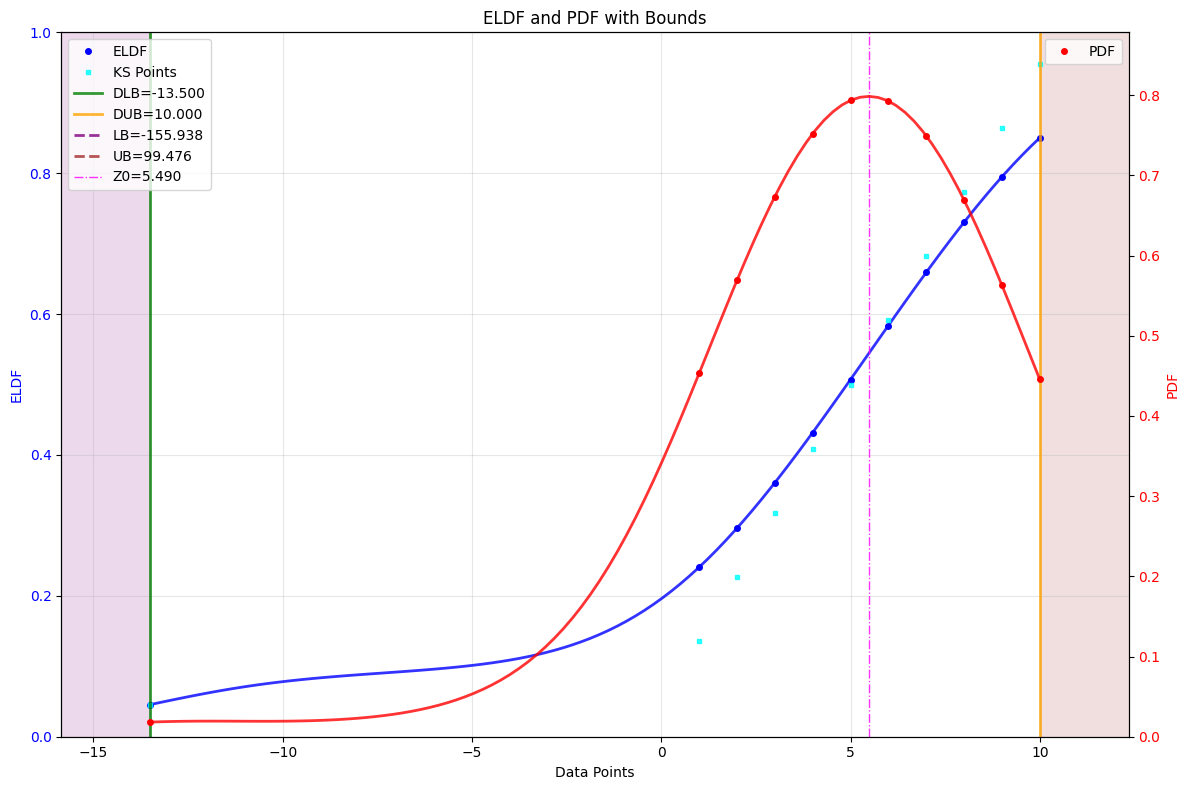

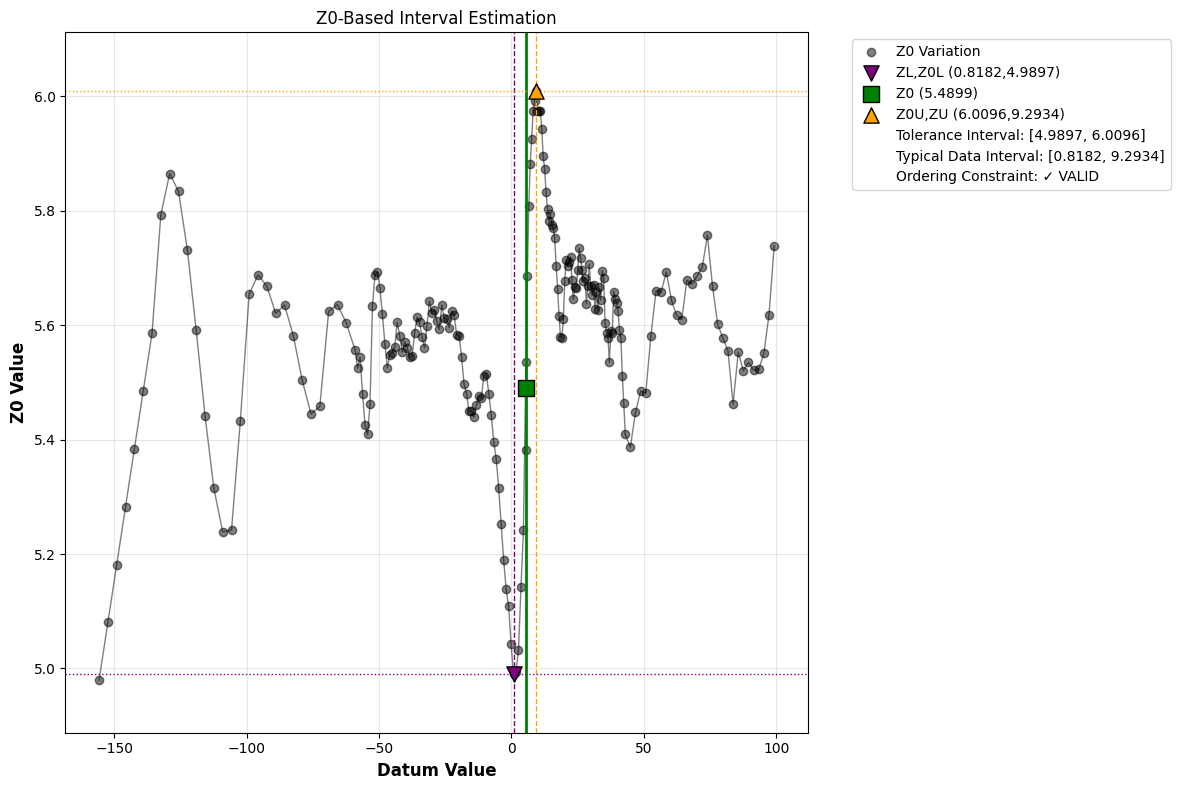

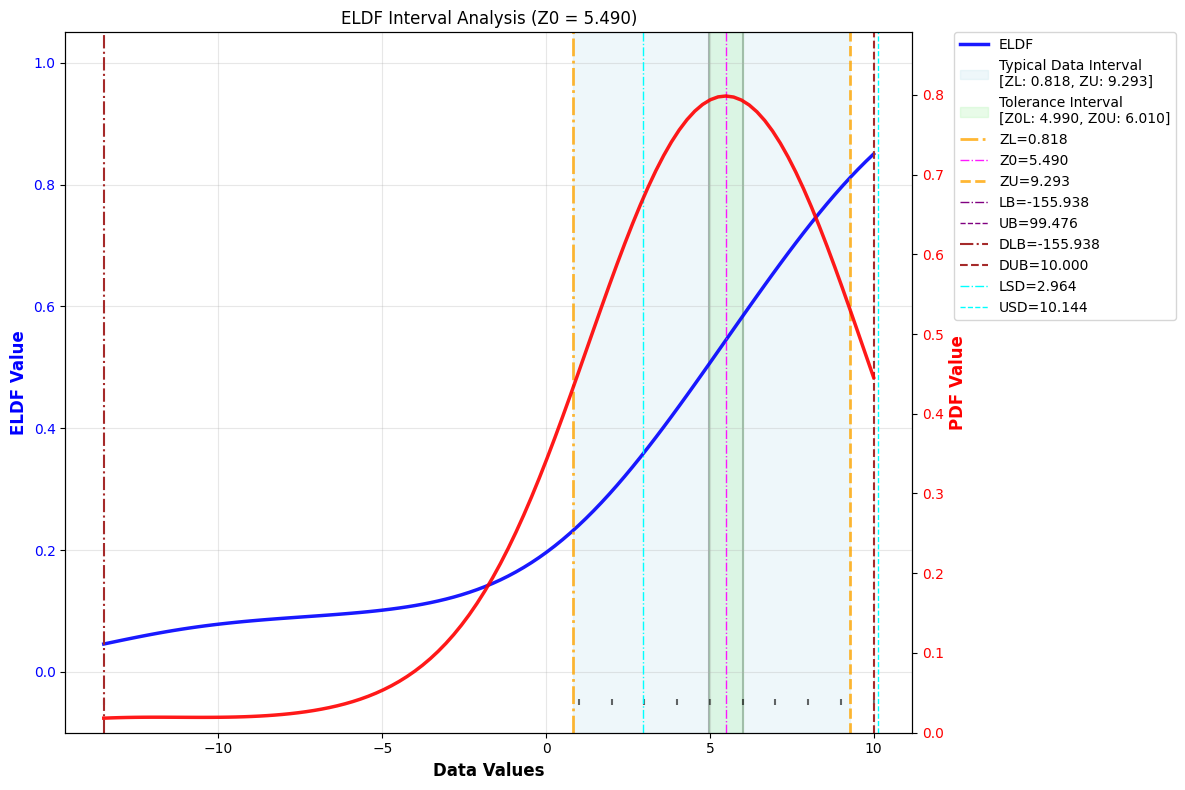

LB: -155.93776968450086
LSB: -13.5
DLB: -13.5
LCB: -7.803030303030303
LSD: 2.964280971014115
ZL: 0.8182394174126442
Z0L: 4.9896988533352395
Z0: 5.48989898989899
Z0U: 6.0096390584764325
ZU: 9.293449080684455
USD: 10.143637329814027
UCB: 10.0
DUB: 10.0
USB: 10.595725263965676
UB: 99.47565393644747


In [3]:
from machinegnostics.magcal import IntervalAnalysis

# create an instance of IntervalAnalysis
ia = IntervalAnalysis(verbose=False, n_points=100)

# fit the data
ia.fit(data)

# plot interval analysis insights
ia.plot()

# results aka gnostics data certification
data_certification = ia.results()
# print
for key, value in data_certification.items():
    print(f"{key}: {value}")

## Advanced Users

In [4]:
# Step 1: get GDF

# import
from machinegnostics.magcal import QLDF, ELDF # Local DF are good choice for cluster analysis

# create a QLDF object
qldf = QLDF()

# fit the data
qldf.fit(data=data)

# create an ELDF object
eldf = ELDF()

# fit the data
eldf.fit(data=data)


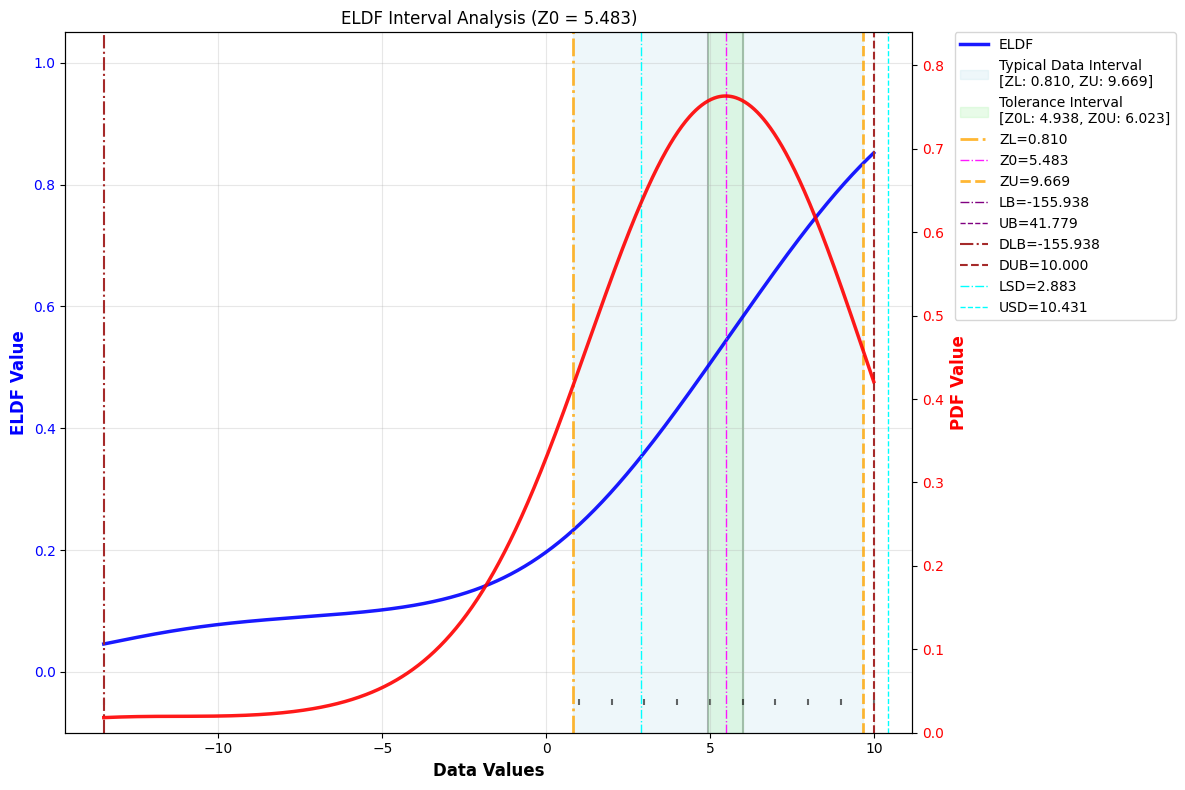

{'LB': -155.93776968450086,
 'LSB': None,
 'DLB': -13.5,
 'LCB': None,
 'LSD': 2.882567969218145,
 'ZL': 0.8103374961119698,
 'Z0L': 4.938000938000959,
 'Z0': 5.483483483483482,
 'Z0U': 6.0232151117425685,
 'ZU': 9.668716398907417,
 'USD': 10.43118199977495,
 'UCB': None,
 'DUB': 10.0,
 'USB': None,
 'UB': 41.7788339826821}

In [5]:
# Step 2: Manual interval analysis

from machinegnostics.magcal import DataIntervals

# create a DataIntervals object
data_intervals = DataIntervals(gdf=eldf)

# fit the data
data_intervals.fit()

# plot
data_intervals.plot()

# print intervals
data_intervals.results()



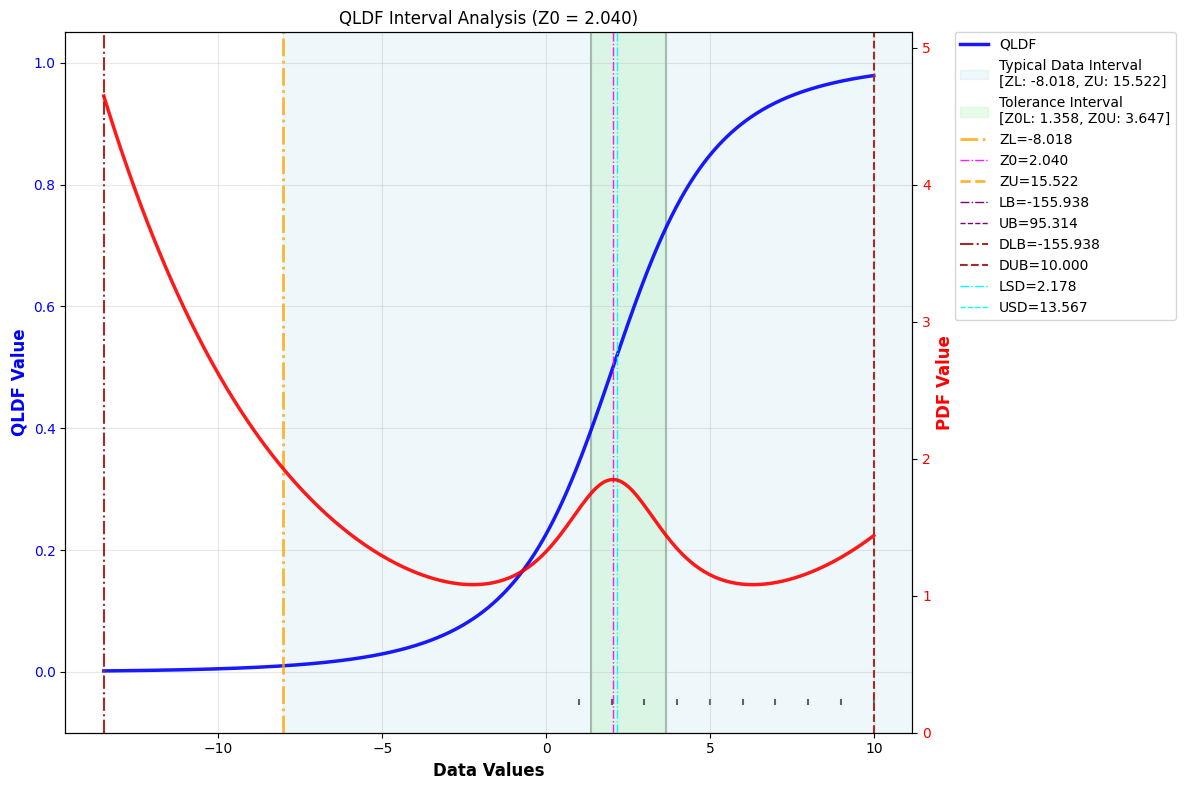

{'LB': -155.93776968450086,
 'LSB': None,
 'DLB': -13.5,
 'LCB': None,
 'LSD': 2.1784866717814797,
 'ZL': -8.017505807458605,
 'Z0L': 1.3583846325048605,
 'Z0': 2.04044550905268,
 'Z0U': 3.647143462258168,
 'ZU': 15.521880274960733,
 'USD': 13.566684391621703,
 'UCB': None,
 'DUB': 10.0,
 'USB': None,
 'UB': 95.31359676026301}

In [6]:
# OR

# if analyst is interested in inliers

# create a DataIntervals object
data_intervals_inliers = DataIntervals(gdf=qldf, verbose=False)

# fit the data
data_intervals_inliers.fit()

# plot
data_intervals_inliers.plot()

# print intervals
data_intervals_inliers.results()